In [2]:
import os
import sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from scipy.special import expit

import import_ipynb
from model import ModelLocBias as Model

importing Jupyter notebook from model.ipynb
The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
FIG_FOLDER = 'fig'
SOURCE_FOLDER = os.path.join('data', 'source')
BACKUP_FOLDER = os.path.join('data', 'backup')
print(f"The source folder is: {os.path.abspath(SOURCE_FOLDER)}")
print(f"The figure folder is: {os.path.abspath(FIG_FOLDER)}")
print(f"The backup folder is: {os.path.abspath(BACKUP_FOLDER)}")

# Create folders
for f in SOURCE_FOLDER, FIG_FOLDER, BACKUP_FOLDER:
    os.makedirs(f, exist_ok=True)

The source folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/source
The figure folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/fig
The backup folder is: /Users/aureliennioche/Documents/PythonProjects/ProspecTonk/data/backup


In [6]:
positions = ['1195_131_vs_1195_517', '469_131_vs_469_517']
df_paths = [f"{BACKUP_FOLDER}/df_fit_overallA_ModelLocBias.csv"] + [f"{BACKUP_FOLDER}/df_fit_overallB_ModelLocBias_{pos}.csv" for pos in positions]
df_paths

['data/backup/df_fit_overallA_ModelLocBias.csv',
 'data/backup/df_fit_overallB_ModelLocBias_1195_131_vs_1195_517.csv',
 'data/backup/df_fit_overallB_ModelLocBias_469_131_vs_469_517.csv']

# Try with one dataset

In [7]:
df_fit = pd.read_csv(df_paths[0], index_col=0)
for c in ("date_begin", "date_end"):
    df_fit[c] = pd.to_datetime(df_fit[c])
df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382


In [8]:
df_elo = pd.read_csv(os.path.join(BACKUP_FOLDER, "df_elo.csv"), index_col=0)
df_elo.index = pd.to_datetime(df_elo.index)
df_elo

,nem,yak,ner,yoh,nen,wot,pac,las,anu,ola,...,olg,jea,pat,bar,ces,lad,ber,dor,eri,fic
date,,,,,,,,,,,,,,,,,,,,,
2016-10-25,1024,1009,1018,984,991,1010,991,982,991,1000,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-26,1032,1009,1018,1003,991,1010,982,964,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-27,1032,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-28,1041,1009,1018,1003,991,1010,982,956,991,999,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
2016-10-29,1063,1009,1018,1011,991,1010,975,941,984,1008,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,938,1243,961,840,1018,1234,1379,713,1117,1287,...,933,760,841,1083,837,753,743,766,702,579
2020-10-22,970,1243,962,840,1018,1234,1347,716,1105,1296,...,935,755,841,1070,832,753,743,795,702,566
2020-10-23,971,1243,970,840,1018,1234,1347,735,1105,1296,...,920,751,841,1072,838,753,758,773,668,566


In [9]:
elo = []

for _, row in df_fit.iterrows():
        
    m = row.monkey
    begin = row.date_begin
    end = row.date_end
        
    df_elo_m = df_elo[m.lower()]
    df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
    elo.append(np.mean(df_elo_m))
        

df_fit['elo'] = elo
df_fit

,distortion,precision,risk_aversion,loc_bias,date_begin,date_end,monkey,condition,n,elo
0,1.327775,0.285684,0.206004,0.051842,2020-02-22,2020-06-22,Ala,gain,8326,1106.786885
0,1.051529,0.231330,-0.582592,-0.071694,2020-02-22,2020-06-22,Ala,loss,8285,1106.786885
0,0.768159,0.447276,0.075584,-0.936214,2020-02-22,2020-06-22,Alv,gain,9996,1096.295082
0,0.462213,0.229596,-0.398661,-0.675575,2020-02-22,2020-06-22,Alv,loss,9988,1096.295082
0,0.915509,0.492803,-0.109141,-0.117283,2020-02-22,2020-06-22,Bar,gain,10361,998.040984
0,0.769959,0.189979,-0.640682,-0.121369,2020-02-22,2020-06-22,Bar,loss,10365,998.040984
0,0.250000,1.612589,0.083753,-10.000000,2020-02-23,2020-06-22,Ola,gain,5235,1426.305785
0,0.250000,0.330200,-0.903815,-1.570219,2020-02-23,2020-06-22,Ola,loss,5237,1426.305785
0,0.610421,0.704556,0.750000,2.518428,2020-05-20,2020-06-18,Yin,gain,389,894.800000
0,0.888765,2.477640,0.571941,10.000000,2020-05-20,2020-06-19,Yin,loss,382,895.096774


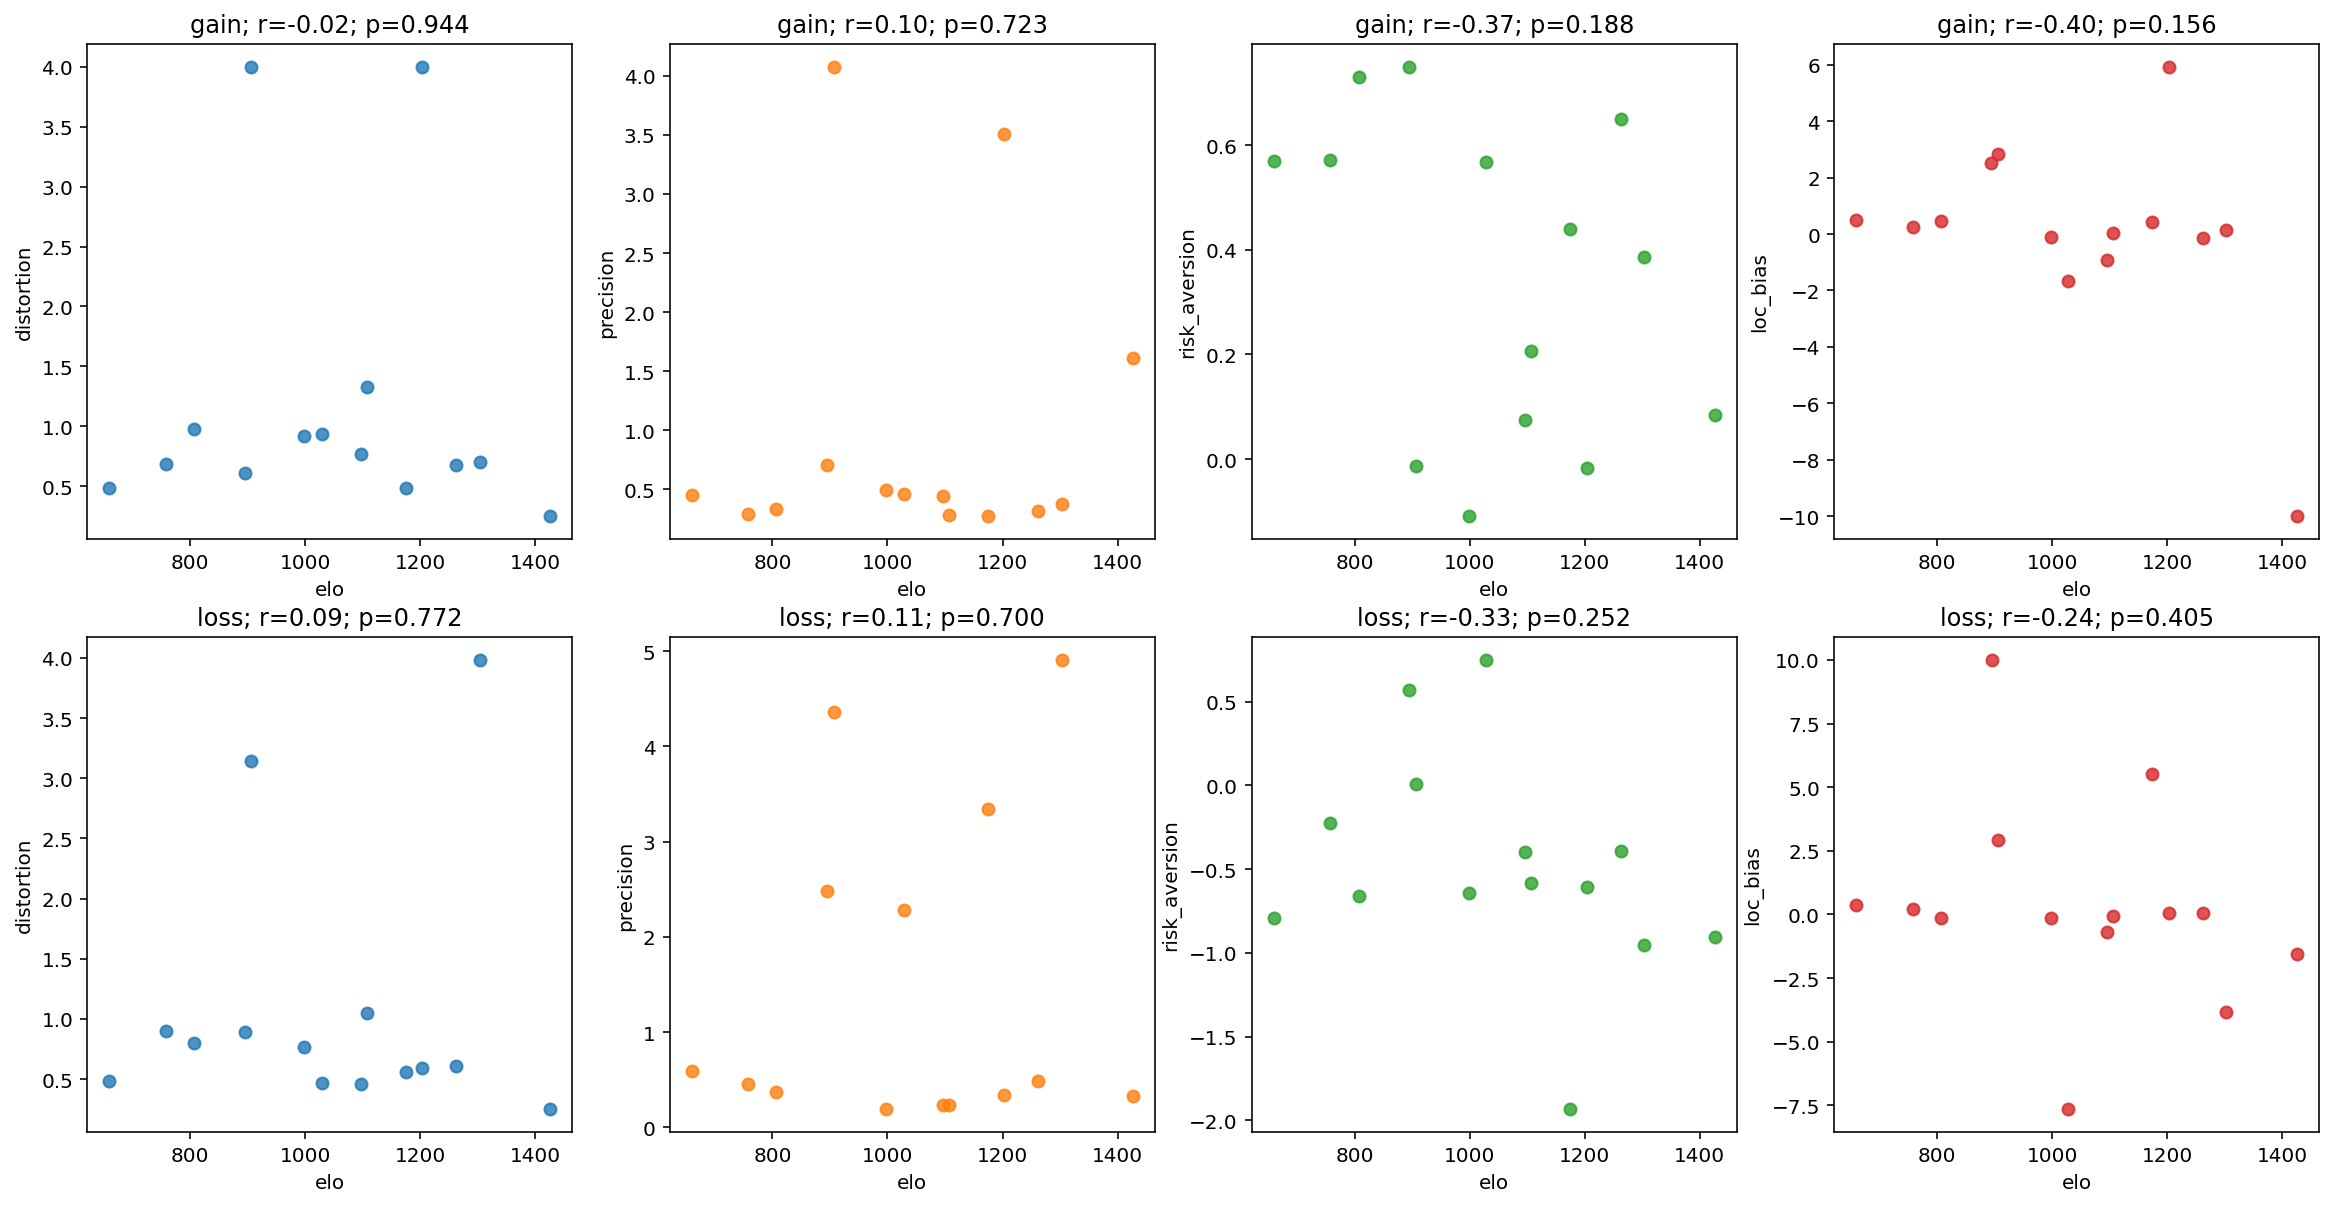

In [10]:
monkeys = df_fit.monkey.unique()
cond = df_fit.condition.unique()
n_param = len(Model.param_labels)

fig, axes = plt.subplots(figsize=(20, 10), nrows=2, ncols=n_param)

for i, cd in enumerate(cond):
    
    df = df_fit[df_fit.condition == cd]
    
    for j, pr in enumerate(Model.param_labels):
            
        r, p = scipy.stats.pearsonr(df.elo.values, df[pr].values)
           
        ax = axes[i, j]
        t = f"{cd}; r={r:.2f}; p={p:.3f}"
        ax.set_title(t)
            
        sns.regplot(x="elo", y=pr, data=df, color=f"C{j}", ax=ax, fit_reg=False)

In [39]:
n_param = len(Model.param_labels)
n_monkey = len(df_fit.monkey.unique())
n_cond = len(df_fit.condition.unique())
param = np.zeros((n_monkey, n_param*n_cond))
elo = np.zeros(n_monkey)
monkeys = np.zeros(n_monkey, dtype=str)
for i, (m, df_m) in enumerate(df_fit.groupby(by="monkey")):
    pr_m = [df_m[df_m.condition == cd].loc[0, pr] for pr in Model.param_labels for cd in df_fit.condition.unique()]
    param[i] = pr_m
    elo[i] = df_m["elo"].values[0]
    monkeys[i] = m

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [81]:
def give_rank(value, list_value):
    if value in list_value:
        list_value = list_value.copy()
        list_value.remove(value)
    for i, v_i in enumerate(sorted(list_value)):
        if value < v_i:
            return i + 1
    return len(list_value) + 1

In [83]:
give_rank(3, [1, 3, 2, 0])

4

In [74]:
print(len(monkeys))

15


In [73]:
for i, m in enumerate(monkeys): 
    idx = list(range(param.shape[0]))
    test_idx = i
    X_idx = idx.copy()
    X_idx.remove(test_idx)

    X = param[np.asarray(X_idx)]
    y = elo[np.asarray(X_idx)]

    X_test = param[test_idx].reshape(-1, 1).T
    y_true = elo[test_idx]

    kernel = C(1.0, (1e-3, 1e8)) * RBF(10, (1e-2, 1e2))
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(X, y)
    y_pred, sigma = gp.predict(X_test, return_std=True)
    rank_pred = give_rank(y_pred[0], elo[X_idx])
    rank_true = give_rank(y_true, elo[X_idx])
    print(f"ELO pred = {y_pred[0]:.2f} (+/-{sigma[0]:.2f}); ELO true = {y_true:.2f}; Err pred = {y_true-y_pred[0]:.2f}")
    print(f"Rank pred = {rank_pred}; Rank true: {rank_true}")
    if rank_pred == rank_true:
        print("SUCCESS!!!")
    print()

ELO pred = 1064.28 (+/-652.11); ELO true = 1239.71; Err pred = 175.43
Rank pred = 9; Rank true: 12

ELO pred = 857.14 (+/-42.10); ELO true = 1126.67; Err pred = 269.52
Rank pred = 4; Rank true: 9

ELO pred = 1276.08 (+/-151.55); ELO true = 1243.38; Err pred = -32.70
Rank pred = 13; Rank true: 13
SUCCESS!!!

ELO pred = 1134.49 (+/-658.36); ELO true = 1155.79; Err pred = 21.30
Rank pred = 10; Rank true: 10
SUCCESS!!!

ELO pred = 1121.04 (+/-107.28); ELO true = 1038.16; Err pred = -82.88
Rank pred = 8; Rank true: 8
SUCCESS!!!

ELO pred = 777.85 (+/-690.46); ELO true = 798.20; Err pred = 20.34
Rank pred = 3; Rank true: 3
SUCCESS!!!

ELO pred = 1107.72 (+/-57.30); ELO true = 667.82; Err pred = -439.89
Rank pred = 8; Rank true: 1

ELO pred = -12.07 (+/-871.01); ELO true = 686.78; Err pred = 698.84
Rank pred = 1; Rank true: 2

ELO pred = 1194.22 (+/-649.21); ELO true = 928.79; Err pred = -265.44
Rank pred = 11; Rank true: 6

ELO pred = 230.82 (+/-862.10); ELO true = 999.46; Err pred = 768.64


# Do it for all datasets

In [76]:
for df_p in df_paths:
    print(df_p)
    print("*" * 30)
    print()
    
    # Import fit data
    df_fit = pd.read_csv(df_p, index_col=0)
    for c in ("date_begin", "date_end"):
        df_fit[c] = pd.to_datetime(df_fit[c])
    df_fit.drop(df_fit.filter(regex="Unname"),axis=1, inplace=True)
    
    # Add elo
    elo = []

    for _, row in df_fit.iterrows():

        m = row.monkey
        begin = row.date_begin
        end = row.date_end

        df_elo_m = df_elo[m.lower()]
        df_elo_m = df_elo_m[(df_elo_m.index >= begin) & (df_elo_m.index <= end)]
        elo.append(np.mean(df_elo_m))
        
    df_fit['elo'] = elo
    
    # Regression
    n_param = len(Model.param_labels)
    n_monkey = len(df_fit.monkey.unique())
    n_cond = len(df_fit.condition.unique())
    param = np.zeros((n_monkey, n_param*n_cond))
    elo = np.zeros(n_monkey)
    monkeys = np.zeros(n_monkey, dtype=str)
    for i, (m, df_m) in enumerate(df_fit.groupby(by="monkey")):
        pr_m = [df_m[df_m.condition == cd].loc[0, pr] for pr in Model.param_labels for cd in df_fit.condition.unique()]
        param[i] = pr_m
        elo[i] = df_m["elo"].values[0]
        monkeys[i] = m
        
    for i, m in enumerate(monkeys): 
        idx = list(range(param.shape[0]))
        test_idx = i
        X_idx = idx.copy()
        X_idx.remove(test_idx)

        X = param[np.asarray(X_idx)]
        y = elo[np.asarray(X_idx)]

        X_test = param[test_idx].reshape(-1, 1).T
        y_true = elo[test_idx]

        kernel = C(1.0, (1e-3, 1e8)) * RBF(10, (1e-2, 1e2))
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
        gp.fit(X, y)
        y_pred, sigma = gp.predict(X_test, return_std=True)
        rank_pred = give_rank(y_pred[0], elo[X_idx])
        rank_true = give_rank(y_true, elo[X_idx])
        print(f"ELO pred = {y_pred[0]:.2f} (+/-{sigma[0]:.2f}); ELO true = {y_true:.2f}; Err pred = {y_true-y_pred[0]:.2f}")
        print(f"Rank pred = {rank_pred}; Rank true: {rank_true}")
        if rank_pred == rank_true:
            print("SUCCESS!!!")
        print()

data/backup/df_fit_overallA_ModelLocBias.csv
******************************

ELO pred = 843.72 (+/-19.48); ELO true = 1262.41; Err pred = 418.69
Rank pred = 4; Rank true: 12

ELO pred = 897.94 (+/-247.19); ELO true = 1106.79; Err pred = 208.85
Rank pred = 5; Rank true: 9

ELO pred = 1549.02 (+/-278.06); ELO true = 1096.30; Err pred = -452.73
Rank pred = 14; Rank true: 8

ELO pred = 5.31 (+/-1025.65); ELO true = 1174.39; Err pred = 1169.08
Rank pred = 1; Rank true: 10

ELO pred = 1093.12 (+/-262.65); ELO true = 998.04; Err pred = -95.08
Rank pred = 7; Rank true: 6

ELO pred = 1197.18 (+/-159.40); ELO true = 757.80; Err pred = -439.38
Rank pred = 10; Rank true: 2

ELO pred = 679.99 (+/-339.62); ELO true = 659.44; Err pred = -20.54
Rank pred = 1; Rank true: 1
SUCCESS!!!

ELO pred = 2.39 (+/-1055.61); ELO true = 906.33; Err pred = 903.94
Rank pred = 1; Rank true: 5

ELO pred = 2.21 (+/-1043.31); ELO true = 1028.38; Err pred = 1026.18
Rank pred = 1; Rank true: 7

ELO pred = -0.00 (+/-991.31